In [82]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# random forest
from sklearn.ensemble import RandomForestClassifier 
# XGBoost
import xgboost
from xgboost import XGBClassifier  # XGBoost classifier
from xgboost import XGBRFClassifier # XGBoost Random Forest for classification

# train test
from sklearn.model_selection import train_test_split

# stratified k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [76]:
# version
print(xgboost.__version__)

1.5.0


In [143]:
# sns set
sns.set_style("darkgrid")

In [95]:
loans = pd.read_csv('loan_data.csv')

In [96]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.head()
loans.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [36]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


Text(0.5, 0, 'FICO')

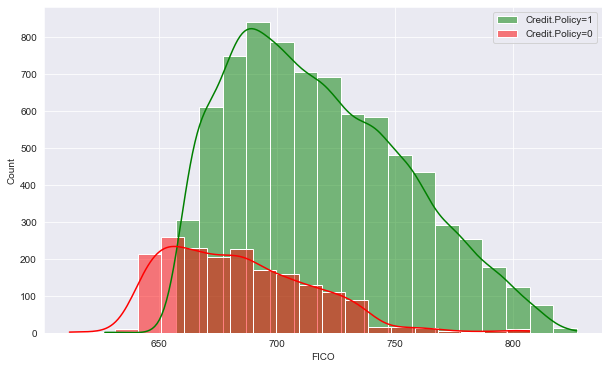

In [144]:
# exploratory data analysis

plt.figure(figsize=(10,6))

sns.histplot(loans[loans['credit.policy']==1]['fico'],
            kde=True, bins=20, color='g', label='Credit.Policy=1')
sns.histplot(loans[loans['credit.policy']==0]['fico'],
            kde=True, bins=20, color='r', label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

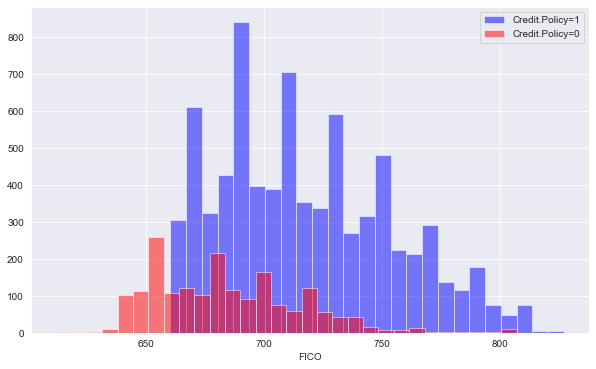

In [170]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='fico', ylabel='count'>

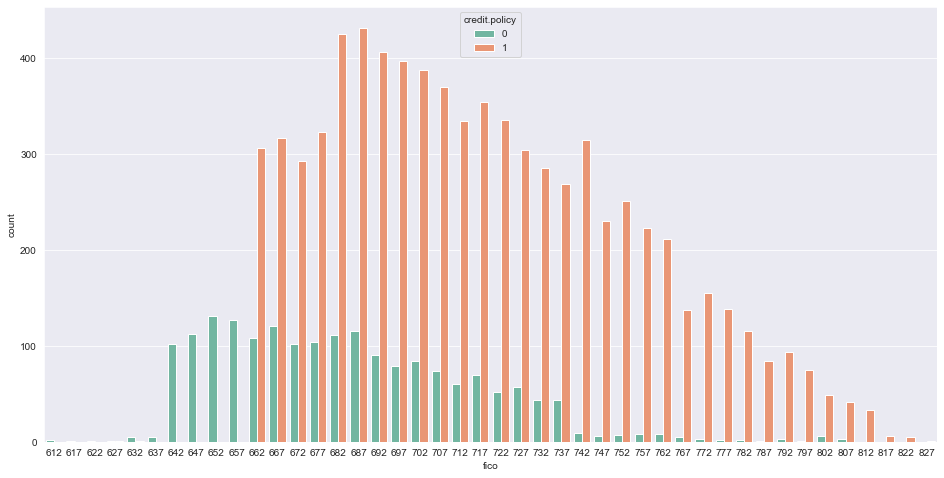

In [171]:
plt.figure(figsize=(16,8))
sns.countplot(x='fico',hue='credit.policy',data=loans,palette='Set2')

<AxesSubplot:xlabel='purpose', ylabel='count'>

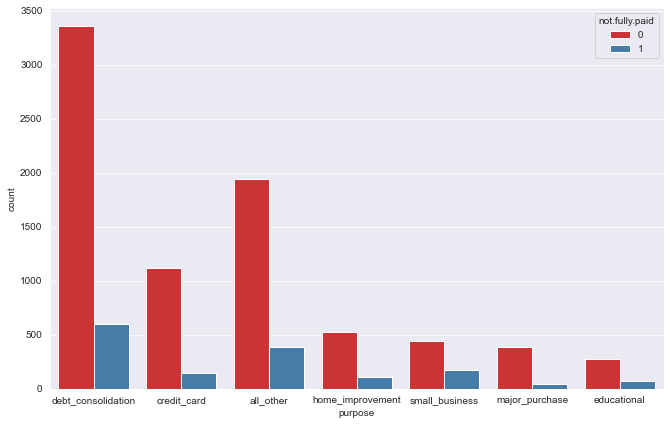

In [172]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

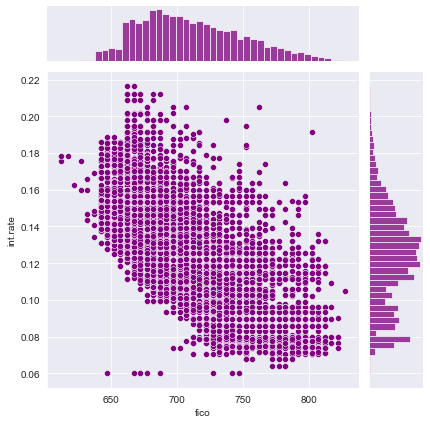

In [173]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

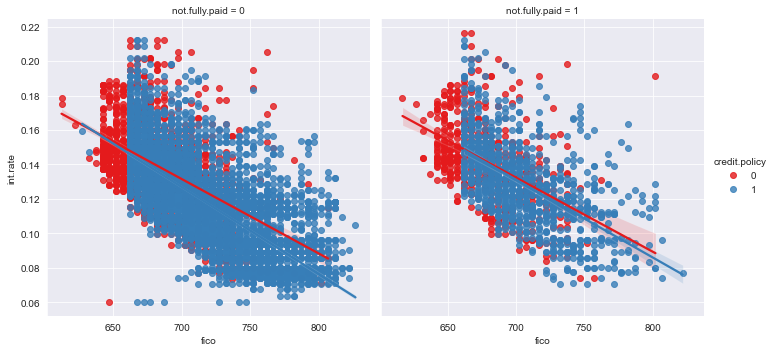

In [174]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [175]:
cat_feats = ['purpose']

In [176]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [177]:
# a  way of dealing with these columns that can be expanded to multiple categorical features if necessary.
final_data.info()
final_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [178]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']  # feature objective 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print(X_train.shape, y_train.shape)

(6704, 18) (6704,)


In [179]:
 
# random forest
from sklearn.ensemble import RandomForestClassifier 
# random forest

rfc = RandomForestClassifier(n_estimators=500) # nº trees
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

In [197]:
# sns set
sns.set_style('ticks')

[[2423    8]
 [ 435    8]] 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874
 



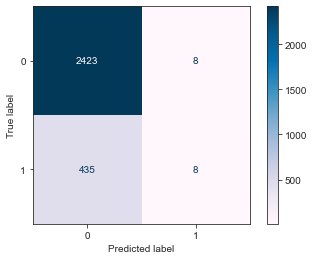

In [198]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, rfcpred),'\n')

print(classification_report(y_test, rfcpred),'\n')

cm = confusion_matrix(y_test, rfcpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap='GnBu')
disp.plot(cmap='PuBu')
plt.show()

In [199]:
rfc.feature_importances_

array([0.01623349, 0.10269598, 0.11496678, 0.10817409, 0.10956244,
       0.07944078, 0.1135296 , 0.11303012, 0.11241336, 0.0535888 ,
       0.01500222, 0.00947661, 0.00812496, 0.01551652, 0.00582231,
       0.00778512, 0.00450672, 0.0101301 ])

In [200]:
#print(cancer.keys())
column=['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']

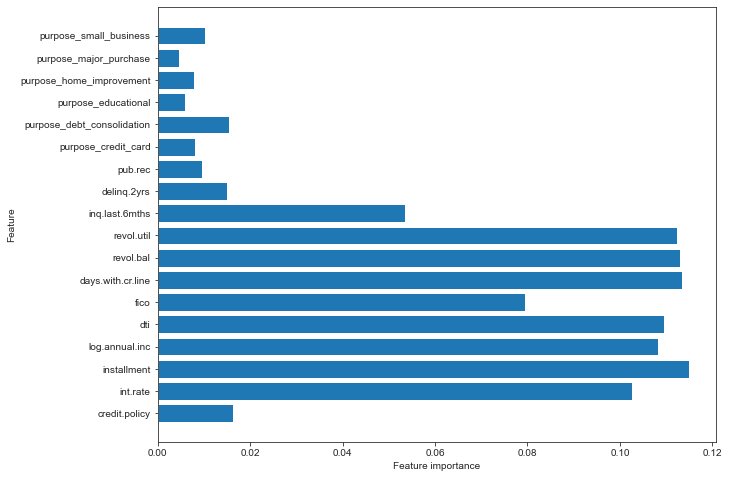

In [201]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), column)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc)

In [202]:
# XBGBoost 

#XGBoost Random Forest for Classification
# XGBoost
import xgboost
from xgboost import XGBClassifier  # XGBoost classifier
from xgboost import XGBRFClassifier # XGBoost Random Forest for classification


In [203]:
# XGBoost
# create model instance
bst = XGBRFClassifier(max_depth=6, learning_rate=1, objective='binary:logistic',
                    subsample=0.9, n_estimators=500, # nº trees
                    colsample_bynode=0.3, # nº features sampled for each split
                    use_label_encoder=False, eval_metric='error')
# fit model
bst.fit(X_train, y_train)
# make predictions
XGpreds = bst.predict(X_test)

[[2428    3]
 [ 443    0]] 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.84      0.77      2874
 



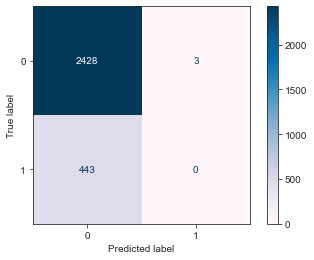

In [204]:
print(confusion_matrix(y_test, XGpreds),'\n')

print(classification_report(y_test, XGpreds),'\n')

cm = confusion_matrix(y_test, XGpreds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='PuBu')
plt.show()

In [206]:
# set up sns
sns.set_style('darkgrid')

In [207]:
# list of models
models = [
    ('RF', RandomForestClassifier(n_estimators=500)),
    ('XGBoostRF', XGBRFClassifier(max_depth=6, learning_rate=1, objective='binary:logistic',
                    subsample=0.9, n_estimators=500, # nº trees
                    colsample_bynode=0.3, # nº features sampled for each split
                    use_label_encoder=False, eval_metric='error'))
]


In [208]:
models

[('RF', RandomForestClassifier(n_estimators=500)),
 ('XGBoostRF',
  XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                  colsample_bynode=0.3, colsample_bytree=None,
                  enable_categorical=False, eval_metric='error', gamma=None,
                  gpu_id=None, importance_type=None, interaction_constraints=None,
                  learning_rate=1, max_delta_step=None, max_depth=6,
                  min_child_weight=None, missing=nan, monotone_constraints=None,
                  n_estimators=500, n_jobs=None, num_parallel_tree=None,
                  objective='binary:logistic', predictor=None, random_state=None,
                  reg_alpha=None, scale_pos_weight=None, subsample=0.9,
                  tree_method=None, use_label_encoder=False,
                  validate_parameters=None, verbosity=None))]

In [209]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    print(name, model)
    kfold = KFold(n_splits=10, shuffle=True, random_state=161)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF RandomForestClassifier(n_estimators=500)
RF: 0.835768 (0.010493)
XGBoostRF XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=0.3, colsample_bytree=None,
                enable_categorical=False, eval_metric='error', gamma=None,
                gpu_id=None, importance_type=None, interaction_constraints=None,
                learning_rate=1, max_delta_step=None, max_depth=6,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, scale_pos_weight=None, subsample=0.9,
                tree_method=None, use_label_encoder=False,
                validate_parameters=None, verbosity=None)
XGBoostRF: 0.837261 (0.008845)


In [210]:
results

[array([0.84500745, 0.83606557, 0.85245902, 0.81967213, 0.84626866,
        0.83880597, 0.84029851, 0.82985075, 0.82985075, 0.81940299]),
 array([0.84649776, 0.83755589, 0.84649776, 0.82265276, 0.84626866,
        0.84029851, 0.84179104, 0.83283582, 0.83731343, 0.82089552])]

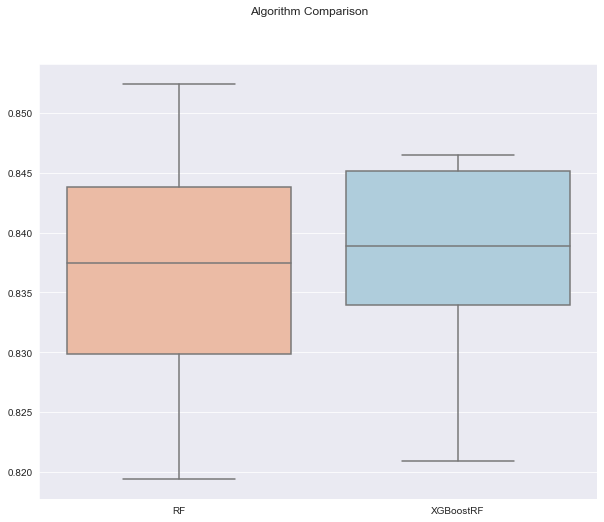

In [211]:

# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
#plt.boxplot(results) 
sns.boxplot(data=results, palette='RdBu')
ax.set_xticklabels(names) 
plt.show()